In [1]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno          # For missing value visualization
import plotly.express as px       # Interactive plots

# Statistics
import scipy.stats as stats

# settings
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

# Data Collection & Loading

In [2]:
DATA_DIR = Path("../data/raw")

# Load train and test CSV files
df_train = pd.read_csv(DATA_DIR / "train.csv")
df_test = pd.read_csv(DATA_DIR / "test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 1: Initial Data Inspection

In [4]:
# dimension
df_train.shape

(1460, 81)

In [5]:
# column names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Target/ID setup and feature lists
target_col = "SalePrice"
id_col = "Id"

train_features = [c for c in df_train.columns if c != target_col]
test_features  = list(df_test.columns)

col_consistency = {
    "target_in_train": target_col in df_train.columns,
    "target_in_test": target_col in df_test.columns,
    "train_feature_count": len(train_features),
    "test_feature_count": len(test_features),
    "missing_in_test": sorted(set(train_features) - set(test_features)),
    "extra_in_test": sorted(set(test_features) - set(train_features)),
    "same_order": train_features == test_features
}
col_consistency

{'target_in_train': True,
 'target_in_test': False,
 'train_feature_count': 80,
 'test_feature_count': 80,
 'missing_in_test': [],
 'extra_in_test': [],
 'same_order': True}

In [7]:
# Quick side-by-side column order comparison (first 25 only)
n = min(len(train_features), len(test_features))
order_compare = pd.DataFrame(
    {"train": train_features[:n], "test": test_features[:n]}
)
order_compare["match"] = order_compare["train"] == order_compare["test"]
order_compare.head(25)

,train,test,match
0,Id,Id,True
1,MSSubClass,MSSubClass,True
2,MSZoning,MSZoning,True
3,LotFrontage,LotFrontage,True
4,LotArea,LotArea,True
5,Street,Street,True
6,Alley,Alley,True
7,LotShape,LotShape,True
8,LandContour,LandContour,True
9,Utilities,Utilities,True


In [8]:
# Full-row duplicates
dup_rows = pd.Series(
    {"train_row_duplicates": df_train.duplicated().sum(),
     "test_row_duplicates":  df_test.duplicated().sum()}
)
dup_rows

train_row_duplicates    0
test_row_duplicates     0
dtype: int64

In [9]:
# ID presence, uniqueness, and overlap
id_checks = pd.DataFrame(
    {
        "has_Id": [id_col in df_train.columns, id_col in df_test.columns],
        "dup_Id_count": [
            df_train[id_col].duplicated().sum() if id_col in df_train.columns else np.nan,
            df_test[id_col].duplicated().sum()  if id_col in df_test.columns  else np.nan
        ],
        "nunique_Id": [
            df_train[id_col].nunique() if id_col in df_train.columns else np.nan,
            df_test[id_col].nunique()  if id_col in df_test.columns  else np.nan
        ]
    },
    index=["train", "test"]
)
id_checks

,has_Id,dup_Id_count,nunique_Id
train,True,0,1460
test,True,0,1459


In [10]:
# Count of ID overlap between train and test (should typically be 0)
id_overlap = (
    set(df_train[id_col]).intersection(set(df_test[id_col]))
    if (id_col in df_train.columns and id_col in df_test.columns)
    else set()
)
pd.Series({"id_overlap_count": len(id_overlap)})

id_overlap_count    0
dtype: int64

In [11]:
# Dtype mismatches across shared columns (useful before concat/modeling)
shared = sorted(set(train_features).intersection(test_features))
dtype_compare = pd.DataFrame(
    {
        "train_dtype": [df_train[c].dtype for c in shared],
        "test_dtype":  [df_test[c].dtype  for c in shared]
    },
    index=shared
)
dtype_mismatches = dtype_compare[dtype_compare["train_dtype"] != dtype_compare["test_dtype"]]
dtype_mismatches

,train_dtype,test_dtype
BsmtFinSF1,int64,float64
BsmtFinSF2,int64,float64
BsmtFullBath,int64,float64
BsmtHalfBath,int64,float64
BsmtUnfSF,int64,float64
GarageArea,int64,float64
GarageCars,int64,float64
TotalBsmtSF,int64,float64


# Step 2: Missing Data

In [12]:
# Concatenate train & test for uniform cleaning (keep a flag to split later)
df_train["__is_train"] = True
df_test["__is_train"]  = False

df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df_all.shape

(2919, 82)

In [13]:
# Missingness summary (count & %), sorted desc
missing_summary = (
    df_all.isna().sum()
    .to_frame("n_missing")
    .assign(pct_missing=lambda d: 100 * d["n_missing"] / len(df_all))
    .sort_values("pct_missing", ascending=False)
)
missing_summary.head(30)

,n_missing,pct_missing
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageFinish,159,5.447071


<Axes: >

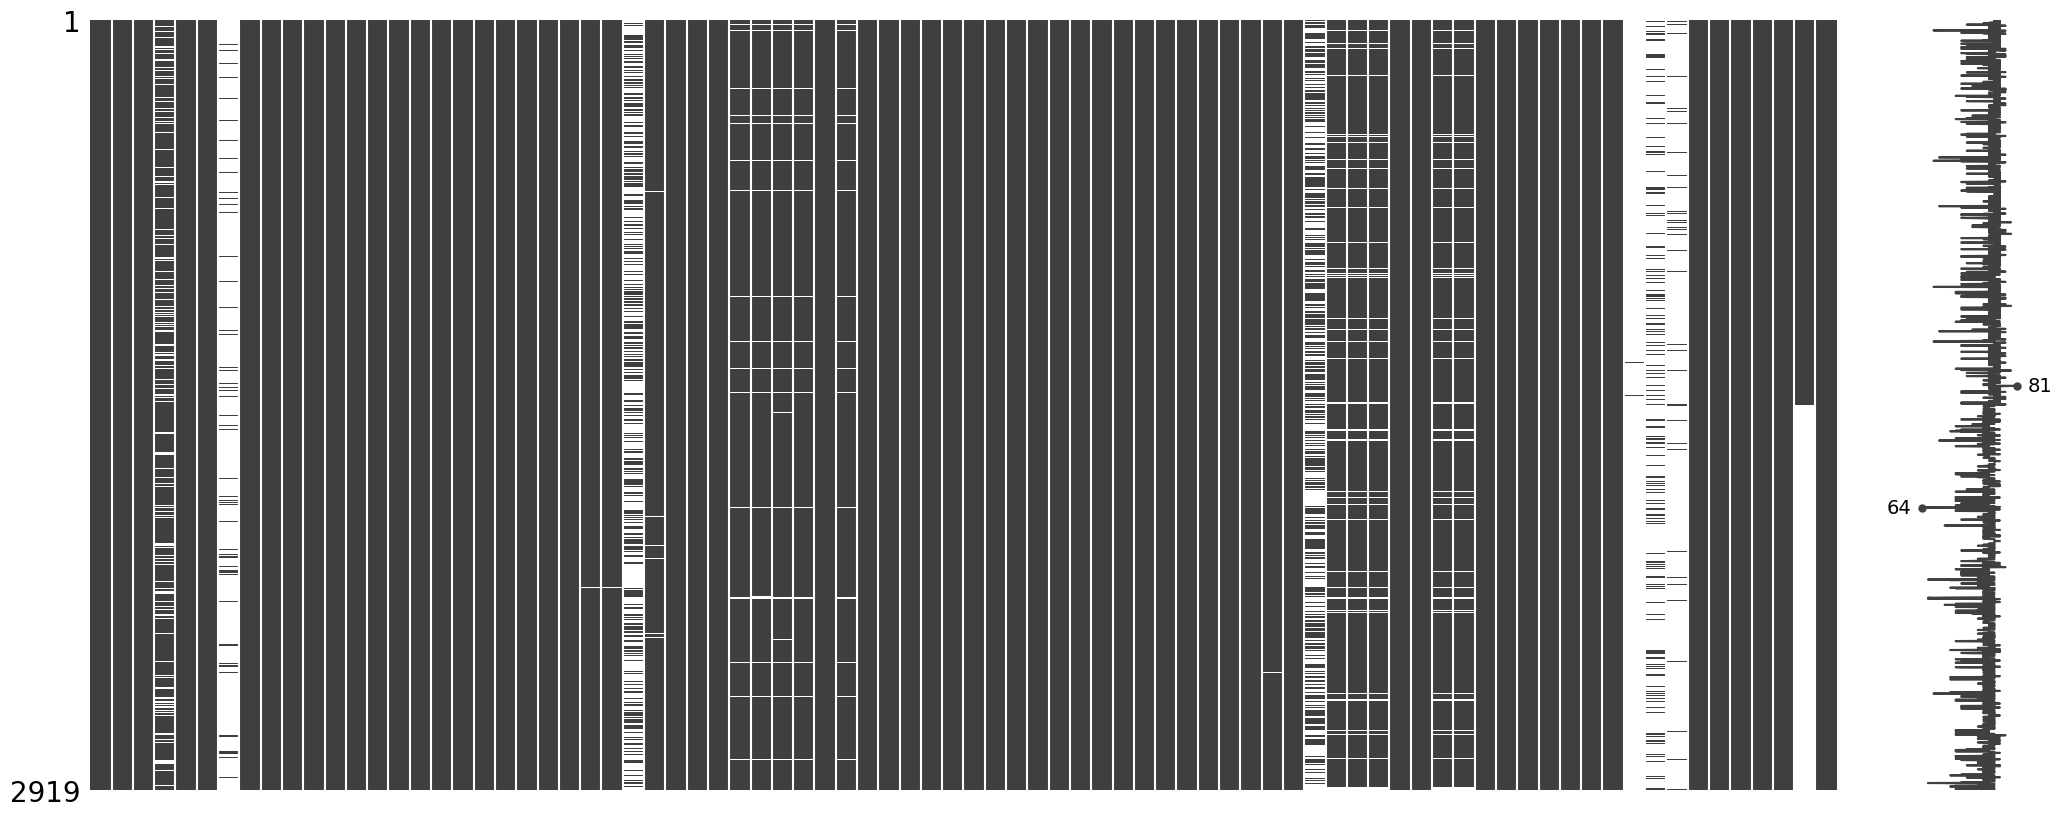

In [14]:
# Visualize missingness
# Matrix view of missingness
msno.matrix(df_all)

<Axes: >

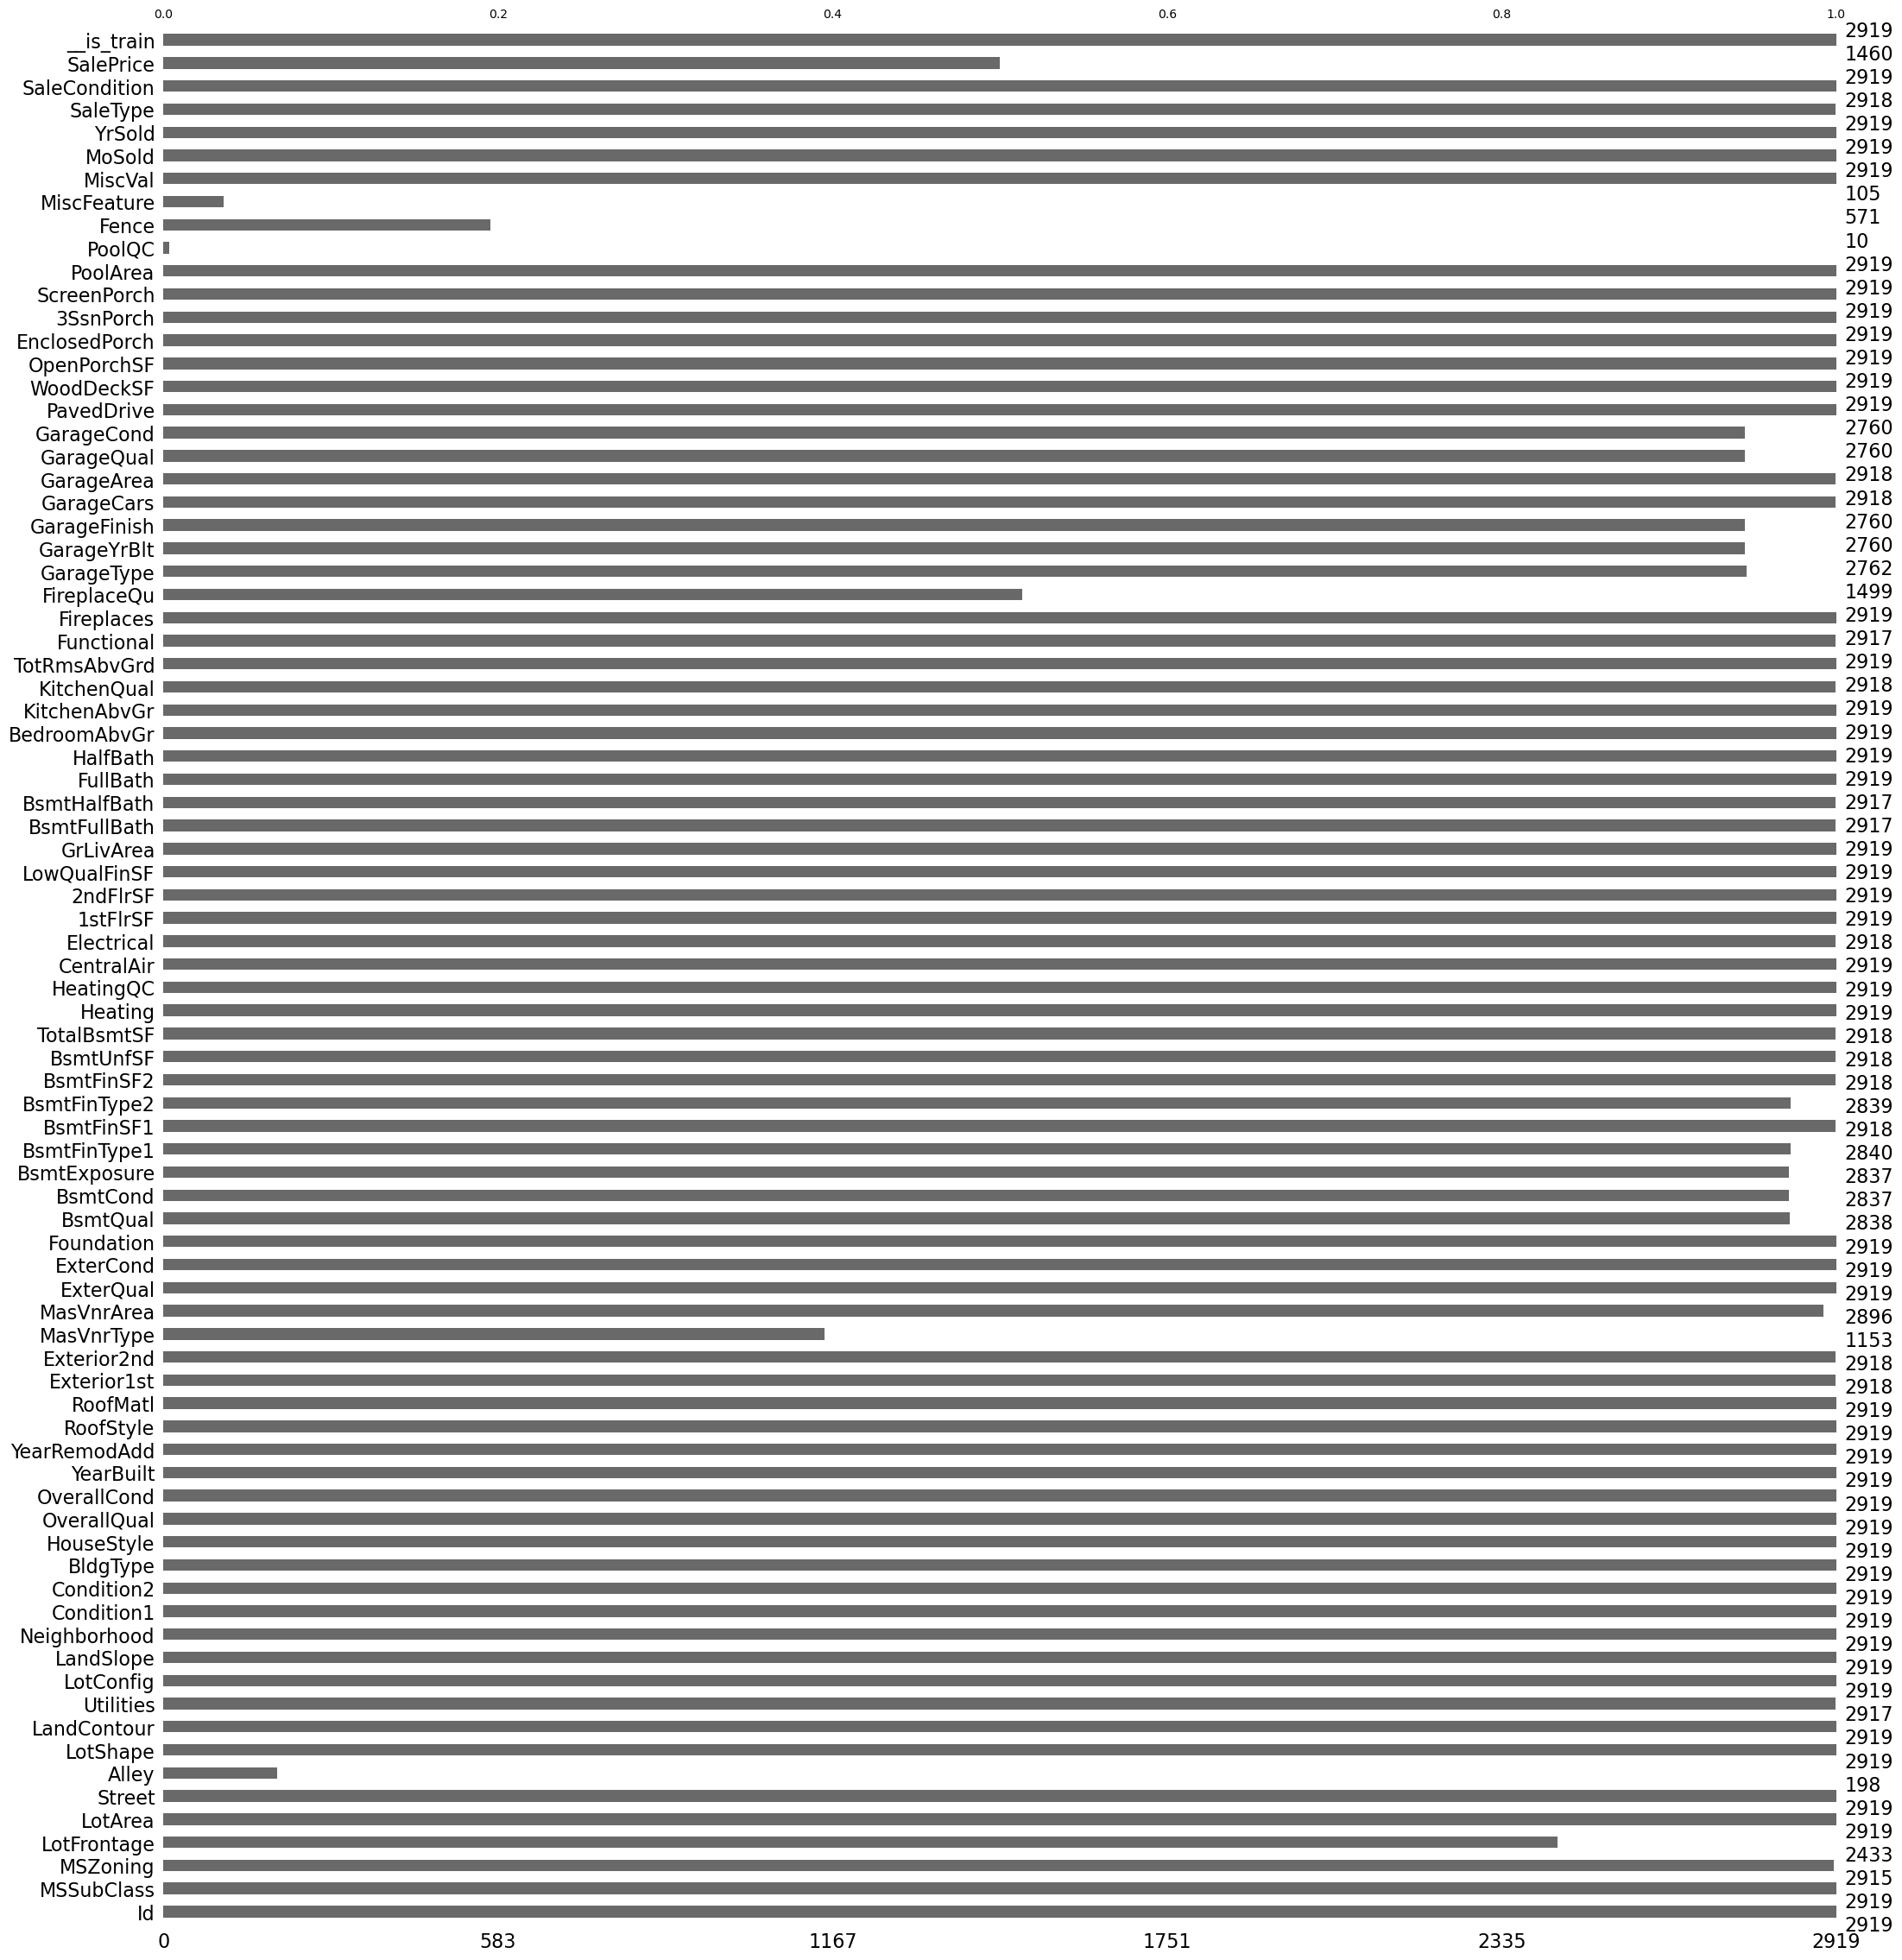

In [15]:
# Visualize missingness
# Bar view of missingness by column
msno.bar(df_all)

In [16]:
# 2A) Fill "NA means NOT PRESENT" categorical features with the literal "None"
none_cats = [
    "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "PoolQC", "Fence", "MiscFeature", "MasVnrType"
]
existing_none_cats = [c for c in none_cats if c in df_all.columns]
df_all[existing_none_cats] = df_all[existing_none_cats].fillna("None")

# quick check
df_all[existing_none_cats].isna().sum().sort_values(ascending=False).head(10)

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
dtype: int64

In [17]:
# 2B) Basement numeric fields: set to 0 where missing (often corresponds to no basement)
bsmt_nums = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]
existing_bsmt_nums = [c for c in bsmt_nums if c in df_all.columns]
df_all[existing_bsmt_nums] = df_all[existing_bsmt_nums].fillna(0)

df_all[existing_bsmt_nums].isna().sum().to_frame("n_missing")

,n_missing
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
BsmtFullBath,0
BsmtHalfBath,0


In [18]:
# 2C) Garage numeric fields: set to 0 if no garage; otherwise sensible fill
# If GarageType is "None", zero-out numeric garage fields
garage_nums = ["GarageYrBlt", "GarageCars", "GarageArea"]
existing_garage_nums = [c for c in garage_nums if c in df_all.columns]

mask_no_garage  = df_all["GarageType"].eq("None") if "GarageType" in df_all.columns else pd.Series(False, index=df_all.index)
mask_has_garage = ~mask_no_garage

# For rows with no garage: fill zeros
for c in existing_garage_nums:
    df_all.loc[mask_no_garage, c] = df_all.loc[mask_no_garage, c].fillna(0)

# For rows with a garage: if GarageYrBlt is missing, use YearBuilt as a proxy
if "GarageYrBlt" in df_all.columns and "YearBuilt" in df_all.columns:
    df_all.loc[mask_has_garage, "GarageYrBlt"] = df_all.loc[mask_has_garage, "GarageYrBlt"].fillna(
        df_all.loc[mask_has_garage, "YearBuilt"]
    )

# Any remaining missing numeric garage values => 0
for c in ["GarageCars", "GarageArea"]:
    if c in df_all.columns:
        df_all[c] = df_all[c].fillna(0)

df_all[existing_garage_nums].isna().sum().to_frame("n_missing")

,n_missing
GarageYrBlt,0
GarageCars,0
GarageArea,0


In [19]:
# 2D) Masonry veneer consistency: if type is None, area should be 0
if "MasVnrType" in df_all.columns:
    df_all.loc[df_all["MasVnrType"].eq("None"), "MasVnrArea"] = 0

if "MasVnrArea" in df_all.columns:
    df_all["MasVnrArea"] = df_all["MasVnrArea"].fillna(0)

df_all[["MasVnrType", "MasVnrArea"]].head(10)

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0
3,None,0.0
4,BrkFace,350.0
5,None,0.0
6,Stone,186.0
7,Stone,240.0
8,None,0.0
9,None,0.0


In [20]:
# 2E) LotFrontage: impute by Neighborhood median, then global median fallback
if "LotFrontage" in df_all.columns and "Neighborhood" in df_all.columns:
    lotfrontage_by_nbhd = df_all.groupby("Neighborhood")["LotFrontage"].median()
    df_all["LotFrontage"] = df_all["LotFrontage"].fillna(df_all["Neighborhood"].map(lotfrontage_by_nbhd))
    df_all["LotFrontage"] = df_all["LotFrontage"].fillna(df_all["LotFrontage"].median())

df_all["LotFrontage"].isna().sum() if "LotFrontage" in df_all.columns else None

np.int64(0)

In [21]:
# 2F) Low-missingness categoricals: fill with mode (dataset-wide)
mode_fill_cats = [
    "MSZoning", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd",
    "SaleType", "Utilities"
]
existing_mode_fill_cats = [c for c in mode_fill_cats if c in df_all.columns]

for c in existing_mode_fill_cats:
    mode_val = df_all[c].mode(dropna=True)
    if len(mode_val):
        df_all[c] = df_all[c].fillna(mode_val.iloc[0])

# Functional: assume typical if missing
if "Functional" in df_all.columns:
    df_all["Functional"] = df_all["Functional"].fillna("Typ")

df_all[existing_mode_fill_cats + (["Functional"] if "Functional" in df_all.columns else [])].isna().sum().to_frame("n_missing")

,n_missing
MSZoning,0
Electrical,0
KitchenQual,0
Exterior1st,0
Exterior2nd,0
SaleType,0
Utilities,0
Functional,0


In [22]:
# 2G) Final missingness snapshot after imputations
missing_summary_after = (
    df_all.isna().sum()
    .to_frame("n_missing")
    .assign(pct_missing=lambda d: 100 * d["n_missing"] / len(df_all))
    .sort_values("pct_missing", ascending=False)
)
missing_summary_after.head(30)

,n_missing,pct_missing
SalePrice,1459,49.982871
Id,0,0.000000
BedroomAbvGr,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000


In [23]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Step 3: Data Type Corrections

In [24]:
# Imports for ordered categoricals
from pandas.api.types import CategoricalDtype

In [25]:
# 3A) Numeric-coded categoricals → categorical
num_as_cat = ["MSSubClass", "MoSold", "YrSold"]
existing_num_as_cat = [c for c in num_as_cat if c in df_all.columns]
df_all[existing_num_as_cat] = df_all[existing_num_as_cat].astype("category")

df_all[existing_num_as_cat].dtypes

MSSubClass    category
MoSold        category
YrSold        category
dtype: object

In [26]:
# 3B) Convert Quality/Condition Variables to Ordinal Categories
# Ordered quality mapping
qual_map = {
    "Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0
}

for col in ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
            "HeatingQC", "KitchenQual", "FireplaceQu",
            "GarageQual", "GarageCond", "PoolQC"]:
    if col in df_all.columns:
        df_all[col] = df_all[col].map(qual_map).astype("int")

In [27]:
# 3C) Convert Exposure/Functionality to Ordinal
# Basement exposure mapping
exposure_map = {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "None": 0}
if "BsmtExposure" in df_all.columns:
    df_all["BsmtExposure"] = df_all["BsmtExposure"].map(exposure_map).astype("int")

# Basement finish type mapping
bsmtfin_map = {
    "GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3,
    "LwQ": 2, "Unf": 1, "None": 0
}
for col in ["BsmtFinType1", "BsmtFinType2"]:
    if col in df_all.columns:
        df_all[col] = df_all[col].map(bsmtfin_map).astype("int")

# Functional mapping
func_map = {
    "Typ": 7, "Min1": 6, "Min2": 5, "Mod": 4,
    "Maj1": 3, "Maj2": 2, "Sev": 1, "Sal": 0
}
if "Functional" in df_all.columns:
    df_all["Functional"] = df_all["Functional"].map(func_map).astype("int")

In [28]:
# 3D) Convert CentralAir to Binary
if "CentralAir" in df_all.columns:
    df_all["CentralAir"] = df_all["CentralAir"].map({"Y": 1, "N": 0}).astype("int")

In [29]:
# 3E) Ensure Numeric Consistency
# Force numeric for garage/basement-related areas & bathrooms
num_cols = [
    "LotFrontage", "MasVnrArea", "GarageYrBlt", "GarageCars", "GarageArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "BsmtFullBath", "BsmtHalfBath"
]
for c in num_cols:
    if c in df_all.columns:
        df_all[c] = pd.to_numeric(df_all[c], errors="coerce")

In [30]:
# Summary of updated dtypes
df_all.dtypes.value_counts()

int64       38
object      28
float64     12
category     1
category     1
category     1
bool         1
Name: count, dtype: int64

# Step 4: Outlier Detection & Treatment

In [31]:
# Focus on training rows for outlier analysis
df_tr = df_all[df_all["__is_train"]].copy()

# Key numeric features where extreme values are common/impactful
key_num = [
    "SalePrice", "GrLivArea", "LotArea", "TotalBsmtSF", "1stFlrSF",
    "GarageArea", "LotFrontage", "MasVnrArea", "OpenPorchSF", "WoodDeckSF"
]
df_tr[key_num].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,61815.97,88000.00,129975.00,163000.0,214000.00,326100.00,442567.01,755000.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,692.18,848.00,1129.50,1464.0,1776.75,2466.10,3123.48,5642.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,1680.00,3311.70,7553.50,9478.5,11601.50,17401.15,37567.64,215245.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,0.00,519.30,795.75,991.5,1298.25,1753.00,2155.05,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,520.00,672.95,882.00,1087.0,1391.25,1831.25,2219.46,4692.0
GarageArea,1460.0,472.980137,213.804841,0.0,0.00,0.00,334.50,480.0,576.00,850.10,1002.79,1418.0
LotFrontage,1460.0,70.176370,22.433457,21.0,21.00,35.00,60.00,70.0,80.00,104.00,137.41,313.0
MasVnrArea,1460.0,102.469178,180.533794,0.0,0.00,0.00,0.00,0.0,162.25,456.00,791.28,1600.0
OpenPorchSF,1460.0,46.660274,66.256028,0.0,0.00,0.00,0.00,25.0,68.00,175.05,285.82,547.0
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.00,0.00,0.00,0.0,168.00,335.00,505.46,857.0


array([[<Axes: xlabel='SalePrice', ylabel='Count'>,
        <Axes: xlabel='GrLivArea', ylabel='Count'>,
        <Axes: xlabel='LotArea', ylabel='Count'>],
       [<Axes: xlabel='TotalBsmtSF'>, <Axes: xlabel='GarageArea'>,
        <Axes: xlabel='LotFrontage'>]], dtype=object)

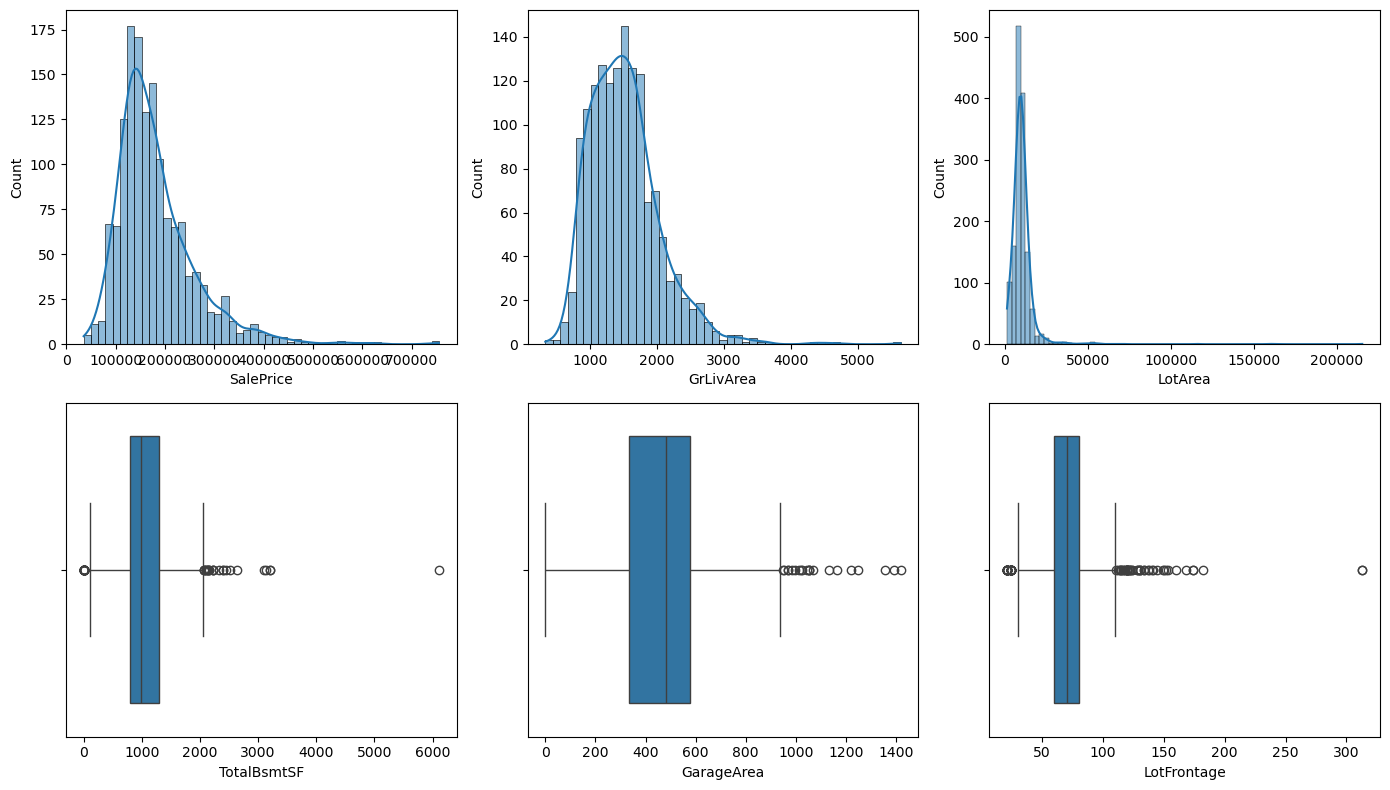

In [32]:
# univariate shapes
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.histplot(df_tr["SalePrice"], ax=axes[0,0], kde=True)
sns.histplot(df_tr["GrLivArea"], ax=axes[0,1], kde=True)
sns.histplot(df_tr["LotArea"], ax=axes[0,2], kde=True)
sns.boxplot(x=df_tr["TotalBsmtSF"], ax=axes[1,0])
sns.boxplot(x=df_tr["GarageArea"], ax=axes[1,1])
sns.boxplot(x=df_tr["LotFrontage"], ax=axes[1,2])
fig.tight_layout()
axes

array([[<Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='LotArea', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>],
       [<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='LotFrontage', ylabel='SalePrice'>]], dtype=object)

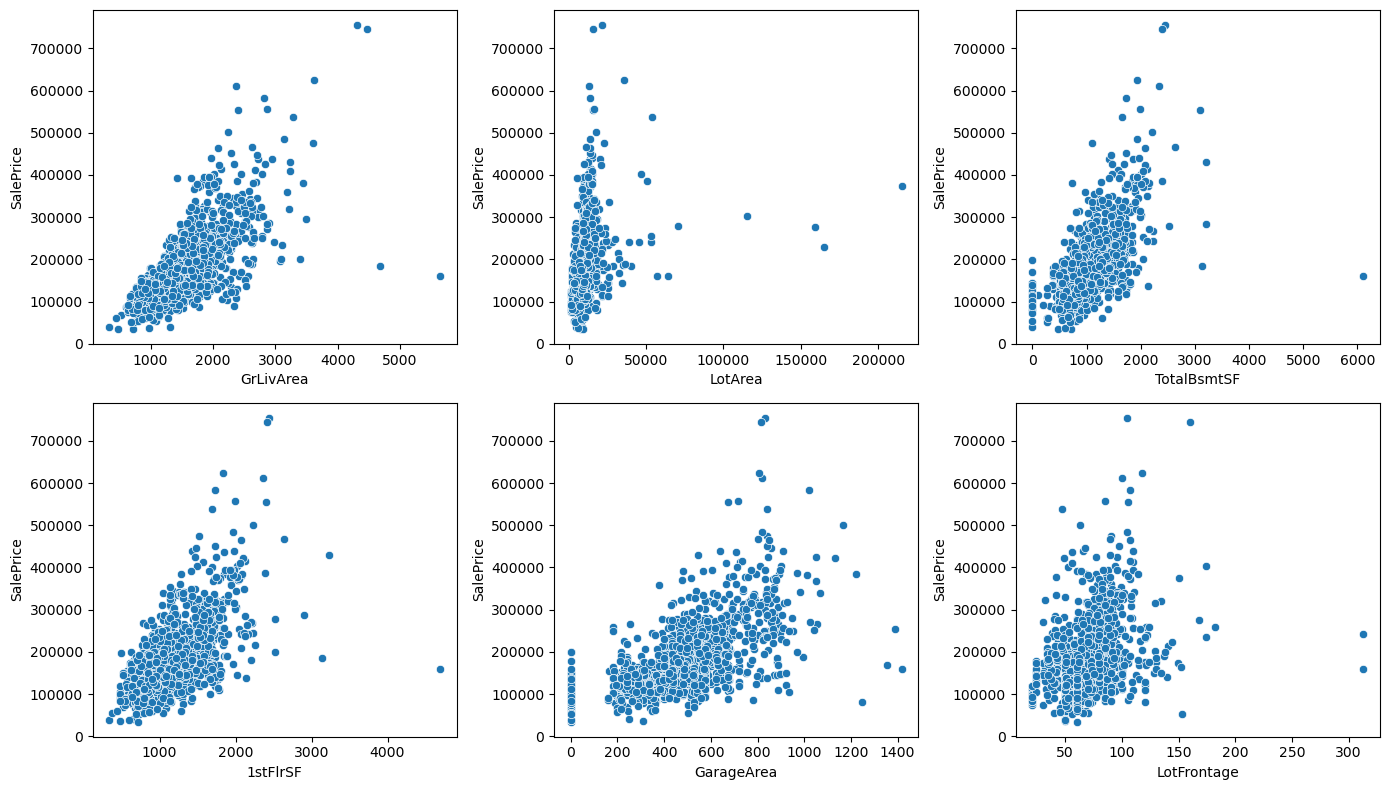

In [33]:
# bivariate vs SalePrice to spot leverage points
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df_tr, ax=axes[0,0])
sns.scatterplot(x="LotArea", y="SalePrice", data=df_tr, ax=axes[0,1])
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df_tr, ax=axes[0,2])
sns.scatterplot(x="1stFlrSF", y="SalePrice", data=df_tr, ax=axes[1,0])
sns.scatterplot(x="GarageArea", y="SalePrice", data=df_tr, ax=axes[1,1])
sns.scatterplot(x="LotFrontage", y="SalePrice", data=df_tr, ax=axes[1,2])
fig.tight_layout()
axes

In [34]:
# IQR-based bounds for several heavy-tailed numeric features
iqr_cols = ["GrLivArea", "LotArea", "TotalBsmtSF", "GarageArea", "LotFrontage"]
iqr_bounds = {}
for c in iqr_cols:
    q1, q3 = df_tr[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    iqr_bounds[c] = (lower, upper)

pd.DataFrame(iqr_bounds, index=["lower", "upper"]).T

,lower,upper
GrLivArea,158.625,2747.625
LotArea,1481.500,17673.500
TotalBsmtSF,42.000,2052.000
GarageArea,-27.750,938.250
LotFrontage,30.000,110.000


In [35]:
# How many IQR-outliers per feature (useful to gauge severity)
outlier_masks = {}
for c in iqr_cols:
    lo, hi = iqr_bounds[c]
    outlier_masks[c] = (df_tr[c] < lo) | (df_tr[c] > hi)

outlier_counts = pd.Series({c: m.sum() for c, m in outlier_masks.items()}).sort_values(ascending=False)
outlier_counts

LotFrontage    93
LotArea        69
TotalBsmtSF    61
GrLivArea      31
GarageArea     21
dtype: int64

In [36]:
# Consolidated candidate outliers (union across selected columns)
candidate_union_mask = pd.concat([outlier_masks[c] for c in iqr_cols], axis=1).any(axis=1)
candidates = df_tr.loc[candidate_union_mask, ["Id", "SalePrice"] + iqr_cols] \
                  .sort_values(["GrLivArea", "SalePrice"], ascending=[False, True])
candidates.head(30)

,Id,SalePrice,GrLivArea,LotArea,TotalBsmtSF,GarageArea,LotFrontage
1298,1299,160000.0,5642,63887,6110.0,1418.0,313.0
523,524,184750.0,4676,40094,3138.0,884.0,130.0
1182,1183,745000.0,4476,15623,2396.0,813.0,160.0
691,692,755000.0,4316,21535,2444.0,832.0,104.0
1169,1170,625000.0,3627,35760,1930.0,807.0,118.0
185,186,475000.0,3608,22950,1107.0,840.0,90.0
304,305,295000.0,3493,18386,1470.0,870.0,87.0
1268,1269,381000.0,3447,14100,728.0,1014.0,70.0
635,636,200000.0,3395,10896,1440.0,0.0,60.0
769,770,538000.0,3279,53504,1650.0,841.0,47.0


In [37]:
# Influence diagnostics using a simple OLS on log(SalePrice)
# (Good to catch leverage points not obvious in univariate cuts.)
import statsmodels.api as sm

ols_feats = ["GrLivArea", "OverallQual", "TotalBsmtSF", "GarageCars", "YearBuilt"]
X = sm.add_constant(df_tr[ols_feats])
y = np.log1p(df_tr["SalePrice"])

ols_model = sm.OLS(y, X).fit()
influence = ols_model.get_influence()
cooks = pd.Series(influence.cooks_distance[0], index=df_tr.index)

cooks_threshold = 4 / (X.shape[0] - X.shape[1] - 1)
top_influential = cooks.sort_values(ascending=False).head(20)
pd.DataFrame({
    "Id": df_tr.loc[top_influential.index, "Id"],
    "cooksD": top_influential.values,
    "GrLivArea": df_tr.loc[top_influential.index, "GrLivArea"],
    "SalePrice": df_tr.loc[top_influential.index, "SalePrice"],
}).reset_index(drop=True)

,Id,cooksD,GrLivArea,SalePrice
0,1299,4.793852,5642,160000.0
1,524,0.444557,4676,184750.0
2,917,0.021313,480,35311.0
3,496,0.020308,720,34900.0
4,677,0.017216,1774,87000.0
5,31,0.014827,1317,40000.0
6,969,0.014486,968,37900.0
7,1063,0.013520,2337,90000.0
8,458,0.012138,1663,256000.0
9,729,0.011801,1776,110000.0


In [38]:
# Competition-pattern check: very large above-ground area but unusually low price
low_price_thr = df_tr["SalePrice"].quantile(0.25)
big_area_thr  = max(4000, df_tr["GrLivArea"].quantile(0.995))  # use known heuristic or 99.5% quantile
big_low_mask  = (df_tr["GrLivArea"] >= big_area_thr) & (df_tr["SalePrice"] < low_price_thr)

df_tr.loc[big_low_mask, ["Id", "Neighborhood", "SalePrice", "GrLivArea", "TotalBsmtSF", "GarageArea"]]

,Id,Neighborhood,SalePrice,GrLivArea,TotalBsmtSF,GarageArea


In [39]:
# Decide which rows to drop from TRAIN ONLY:
# - extremely large GrLivArea but unusually low price (big_low_mask)
# - OR very high Cook's distance
to_drop_idx = df_tr.index[big_low_mask | (cooks > cooks_threshold)]

drop_summary = pd.DataFrame({
    "Id": df_tr.loc[to_drop_idx, "Id"],
    "GrLivArea": df_tr.loc[to_drop_idx, "GrLivArea"],
    "SalePrice": df_tr.loc[to_drop_idx, "SalePrice"],
    "cooksD": cooks.loc[to_drop_idx],
}).sort_values(["GrLivArea", "cooksD"], ascending=[False, False])
drop_summary

,Id,GrLivArea,SalePrice,cooksD
1298,1299,5642,160000.0,4.793852
523,524,4676,184750.0,0.444557
185,186,3608,475000.0,0.008056
1268,1269,3447,381000.0,0.003407
769,770,3279,538000.0,0.004727
...,...,...,...,...
710,711,729,52000.0,0.003231
495,496,720,34900.0,0.020308
1337,1338,693,52500.0,0.005994
916,917,480,35311.0,0.021313


In [40]:
# Apply the drop (TRAIN rows only). Test rows remain untouched.
to_drop_ids = [1299, 524]  # the known Ames outliers

# Find their actual row indices in df_all
to_drop_idx = df_all.index[df_all["Id"].isin(to_drop_ids)]

# Drop only from TRAIN rows
df_all_step4 = df_all.drop(index=to_drop_idx).reset_index(drop=True)

# Quick shape check
df_all.shape, df_all_step4.shape

((2919, 82), (2917, 82))

# Step 5: Consistency Checks

In [41]:
# Start from Step 4 output
df_all_step5 = df_all_step4.copy()
df_all_step5.shape

(2917, 82)

In [42]:
# ---- Define logical inconsistency flags (BEFORE FIX) ----
# Sums that should match
basement_sum_mismatch = (
    (df_all_step5["TotalBsmtSF"] != (df_all_step5["BsmtFinSF1"] + df_all_step5["BsmtFinSF2"] + df_all_step5["BsmtUnfSF"]))
)

grliv_sum_mismatch = (
    (df_all_step5["GrLivArea"] != (df_all_step5["1stFlrSF"] + df_all_step5["2ndFlrSF"] + df_all_step5["LowQualFinSF"]))
)

# Garage: if no garage, area/cars/yr should be zero
garage_none_mismatch = (
    df_all_step5["GarageType"].eq("None") &
    (
        (df_all_step5["GarageArea"] > 0) |
        (df_all_step5["GarageCars"] > 0) |
        (df_all_step5["GarageYrBlt"] > 0)
    )
)

# Fireplaces / Pool: quality must be zero if area/count is zero; must be >0 if present
fireplace_mismatch = (
    ((df_all_step5["Fireplaces"] == 0) & (df_all_step5["FireplaceQu"] > 0)) |
    ((df_all_step5["Fireplaces"] > 0) & (df_all_step5["FireplaceQu"] == 0))
)

pool_mismatch = (
    ((df_all_step5["PoolArea"] == 0) & (df_all_step5["PoolQC"] > 0)) |
    ((df_all_step5["PoolArea"] > 0) & (df_all_step5["PoolQC"] == 0))
)

# Masonry veneer: type/area should align
masvnr_mismatch = (
    ((df_all_step5["MasVnrType"] == "None") & (df_all_step5["MasVnrArea"] > 0)) |
    ((df_all_step5["MasVnrArea"] == 0) & (df_all_step5["MasVnrType"] != "None"))
)

# Remodel year should be >= built year
year_remod_lt_built = (df_all_step5["YearRemodAdd"] < df_all_step5["YearBuilt"])

consistency_before = pd.Series({
    "basement_sum_mismatch": int(basement_sum_mismatch.sum()),
    "grliv_sum_mismatch": int(grliv_sum_mismatch.sum()),
    "garage_none_mismatch": int(garage_none_mismatch.sum()),
    "fireplace_mismatch": int(fireplace_mismatch.sum()),
    "pool_mismatch": int(pool_mismatch.sum()),
    "masvnr_mismatch": int(masvnr_mismatch.sum()),
    "year_remod_lt_built": int(year_remod_lt_built.sum()),
})
consistency_before

basement_sum_mismatch    0
grliv_sum_mismatch       0
garage_none_mismatch     0
fireplace_mismatch       0
pool_mismatch            3
masvnr_mismatch          3
year_remod_lt_built      1
dtype: int64

In [43]:
# ---- FIX 1: Enforce additive identities ----
# Basement: TotalBsmtSF = parts sum
df_all_step5["TotalBsmtSF"] = (
    df_all_step5["BsmtFinSF1"] + df_all_step5["BsmtFinSF2"] + df_all_step5["BsmtUnfSF"]
)

# Above grade: GrLivArea = 1st + 2nd + LowQual
df_all_step5["GrLivArea"] = (
    df_all_step5["1stFlrSF"] + df_all_step5["2ndFlrSF"] + df_all_step5["LowQualFinSF"]
)

# Recheck deltas
pd.Series({
    "basement_sum_mismatch_after": int((df_all_step5["TotalBsmtSF"] != (df_all_step5["BsmtFinSF1"] + df_all_step5["BsmtFinSF2"] + df_all_step5["BsmtUnfSF"])).sum()),
    "grliv_sum_mismatch_after": int((df_all_step5["GrLivArea"] != (df_all_step5["1stFlrSF"] + df_all_step5["2ndFlrSF"] + df_all_step5["LowQualFinSF"])).sum()),
})

basement_sum_mismatch_after    0
grliv_sum_mismatch_after       0
dtype: int64

In [44]:
# ---- FIX 2: Garage logic ----
mask_no_garage = df_all_step5["GarageType"].eq("None")
cols_zero_if_no_gar = ["GarageCars", "GarageArea", "GarageYrBlt"]
for c in cols_zero_if_no_gar:
    df_all_step5.loc[mask_no_garage, c] = 0

# If cars are 0, area should be 0 as well (conservative, avoids phantom areas)
df_all_step5.loc[df_all_step5["GarageCars"] == 0, "GarageArea"] = 0

# Year sanity: if a (non-None) garage year looks implausible, set to YearBuilt
mask_has_gar = ~mask_no_garage
df_all_step5.loc[mask_has_gar & (df_all_step5["GarageYrBlt"] < 1800), "GarageYrBlt"] = df_all_step5.loc[mask_has_gar & (df_all_step5["GarageYrBlt"] < 1800), "YearBuilt"]

# Cast counts to int
df_all_step5["GarageCars"] = df_all_step5["GarageCars"].astype(int)
df_all_step5[["GarageType", "GarageFinish"]].head(3)

,GarageType,GarageFinish
0,Attchd,RFn
1,Attchd,RFn
2,Attchd,RFn


In [45]:
# ---- FIX 3: Fireplace logic ----
# Zero quality when zero fireplaces
df_all_step5.loc[df_all_step5["Fireplaces"] == 0, "FireplaceQu"] = 0

# If fireplaces present but quality missing (0), fill from Neighborhood median (fallback=3 'TA')
nbhd_fp_med = (
    df_all_step5.loc[df_all_step5["Fireplaces"] > 0]
    .groupby("Neighborhood")["FireplaceQu"]
    .median()
    .round()
    .astype(int)
)
fill_idx = (df_all_step5["Fireplaces"] > 0) & (df_all_step5["FireplaceQu"] == 0)
df_all_step5.loc[fill_idx, "FireplaceQu"] = df_all_step5.loc[fill_idx, "Neighborhood"].map(nbhd_fp_med).fillna(3).astype(int)

df_all_step5.loc[fill_idx, ["Neighborhood", "Fireplaces", "FireplaceQu"]].head(10)

,Neighborhood,Fireplaces,FireplaceQu


In [46]:
# ---- FIX 4: Pool logic ----
# Zero quality when no pool
df_all_step5.loc[df_all_step5["PoolArea"] == 0, "PoolQC"] = 0

# If pool present but quality == 0, fill with global median among pools (fallback=3)
pool_present = df_all_step5["PoolArea"] > 0
global_pool_med = int(df_all_step5.loc[pool_present, "PoolQC"].median()) if pool_present.any() else 3
df_all_step5.loc[pool_present & (df_all_step5["PoolQC"] == 0), "PoolQC"] = global_pool_med

df_all_step5.loc[pool_present, ["PoolArea", "PoolQC"]].head(10)

,PoolArea,PoolQC
197,512,5
809,648,2
1169,576,4
1181,555,5
1384,519,2
1421,738,4
1972,144,5
2418,368,4
2501,444,4
2571,228,5


In [47]:
# ---- FIX 5: Masonry veneer mutual consistency ----
# If area == 0 -> type 'None'
df_all_step5.loc[df_all_step5["MasVnrArea"] == 0, "MasVnrType"] = "None"
# If type 'None' but area > 0 -> make area 0 (conservative & leak-safe)
df_all_step5.loc[(df_all_step5["MasVnrType"] == "None") & (df_all_step5["MasVnrArea"] > 0), "MasVnrArea"] = 0

df_all_step5.loc[df_all_step5["MasVnrArea"] == 0, ["MasVnrType", "MasVnrArea"]].head(10)

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0
10,None,0.0
12,None,0.0
15,None,0.0
17,None,0.0
18,None,0.0


In [48]:
# ---- FIX 6: Basement categorical logic aligned with area ----
# If no basement area, set ordinal basement descriptors to 0
no_bsmt = df_all_step5["TotalBsmtSF"] == 0
for col in ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]:
    df_all_step5.loc[no_bsmt, col] = 0

# If basement area > 0 but ordinal fields are 0, fill with Neighborhood medians or sensible defaults
has_bsmt = df_all_step5["TotalBsmtSF"] > 0

def nbhd_median_int(col, mask):
    med = df_all_step5.loc[mask].groupby("Neighborhood")[col].median().round().astype(int)
    return med

for col, default_val in [
    ("BsmtQual", 3),       # TA
    ("BsmtCond", 3),       # TA
    ("BsmtExposure", 1),   # No
    ("BsmtFinType1", 1),   # Unf
    ("BsmtFinType2", 1),   # Unf
]:
    med_map = nbhd_median_int(col, has_bsmt & (df_all_step5[col] > 0))
    fix_idx = has_bsmt & (df_all_step5[col] == 0)
    df_all_step5.loc[fix_idx, col] = df_all_step5.loc[fix_idx, "Neighborhood"].map(med_map).fillna(default_val).astype(int)

df_all_step5.loc[has_bsmt & (df_all_step5["BsmtQual"] == 0), ["Neighborhood", "TotalBsmtSF", "BsmtQual"]].head(10)

,Neighborhood,TotalBsmtSF,BsmtQual


In [49]:
# ---- FIX 7: Year constraints ----
# Enforce YearRemodAdd >= YearBuilt
df_all_step5["YearRemodAdd"] = np.maximum(df_all_step5["YearRemodAdd"], df_all_step5["YearBuilt"])

# Garage year: 0 for no garage already; keep others >= YearBuilt when implausibly low
mask_has_gar = df_all_step5["GarageType"].ne("None")
df_all_step5.loc[mask_has_gar & (df_all_step5["GarageYrBlt"] < 1800), "GarageYrBlt"] = df_all_step5.loc[mask_has_gar & (df_all_step5["GarageYrBlt"] < 1800), "YearBuilt"]

# Cast to integers where semantically integer counts
for c in ["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces"]:
    df_all_step5[c] = df_all_step5[c].astype(int)

# Clip OverallQual/Cond to valid range [1,10]
df_all_step5["OverallQual"] = df_all_step5["OverallQual"].clip(1, 10)
df_all_step5["OverallCond"] = df_all_step5["OverallCond"].clip(1, 10)

df_all_step5[["YearBuilt", "YearRemodAdd", "GarageYrBlt"]].head(10)

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0
3,1915,1970,1998.0
4,2000,2000,2000.0
5,1993,1995,1993.0
6,2004,2005,2004.0
7,1973,1973,1973.0
8,1931,1950,1931.0
9,1939,1950,1939.0


In [50]:
# ---- RECHECK flags (AFTER FIX) ----
basement_sum_mismatch_after = (df_all_step5["TotalBsmtSF"] != (df_all_step5["BsmtFinSF1"] + df_all_step5["BsmtFinSF2"] + df_all_step5["BsmtUnfSF"]))
grliv_sum_mismatch_after    = (df_all_step5["GrLivArea"]    != (df_all_step5["1stFlrSF"] + df_all_step5["2ndFlrSF"] + df_all_step5["LowQualFinSF"]))
garage_none_mismatch_after  = (
    df_all_step5["GarageType"].eq("None") &
    (
        (df_all_step5["GarageArea"] > 0) |
        (df_all_step5["GarageCars"] > 0) |
        (df_all_step5["GarageYrBlt"] > 0)
    )
)
fireplace_mismatch_after    = (
    ((df_all_step5["Fireplaces"] == 0) & (df_all_step5["FireplaceQu"] > 0)) |
    ((df_all_step5["Fireplaces"] > 0) & (df_all_step5["FireplaceQu"] == 0))
)
pool_mismatch_after         = (
    ((df_all_step5["PoolArea"] == 0) & (df_all_step5["PoolQC"] > 0)) |
    ((df_all_step5["PoolArea"] > 0) & (df_all_step5["PoolQC"] == 0))
)
masvnr_mismatch_after       = (
    ((df_all_step5["MasVnrType"] == "None") & (df_all_step5["MasVnrArea"] > 0)) |
    ((df_all_step5["MasVnrArea"] == 0) & (df_all_step5["MasVnrType"] != "None"))
)
year_remod_lt_built_after   = (df_all_step5["YearRemodAdd"] < df_all_step5["YearBuilt"])

consistency_after = pd.Series({
    "basement_sum_mismatch": int(basement_sum_mismatch_after.sum()),
    "grliv_sum_mismatch": int(grliv_sum_mismatch_after.sum()),
    "garage_none_mismatch": int(garage_none_mismatch_after.sum()),
    "fireplace_mismatch": int(fireplace_mismatch_after.sum()),
    "pool_mismatch": int(pool_mismatch_after.sum()),
    "masvnr_mismatch": int(masvnr_mismatch_after.sum()),
    "year_remod_lt_built": int(year_remod_lt_built_after.sum()),
})
consistency_after

basement_sum_mismatch    0
grliv_sum_mismatch       0
garage_none_mismatch     0
fireplace_mismatch       0
pool_mismatch            0
masvnr_mismatch          0
year_remod_lt_built      0
dtype: int64

In [51]:
# Final shapes & handoff
df_train_step5 = (
    df_all_step5[df_all_step5["__is_train"]]
    .drop(columns="__is_train")
    .reset_index(drop=True)
)
df_test_step5 = (
    df_all_step5[~df_all_step5["__is_train"]]
    .drop(columns="__is_train")
    .reset_index(drop=True)
)
df_train_step5.shape, df_test_step5.shape

((1458, 81), (1459, 81))

# Step 6: Standardization & Encoding Prep

In [52]:
# Start from Step 5 outputs
df_train_step6 = df_train_step5.copy()
df_test_step6  = df_test_step5.copy()

# Recombine for consistent transforms (keep a split flag)
df_train_step6["__is_train"] = True
df_test_step6["__is_train"]  = False
df_all_step6 = pd.concat([df_train_step6, df_test_step6], ignore_index=True)
df_all_step6.shape

(2917, 82)

In [53]:
# Cast object cols to 'category' (memory + clarity)
obj_cols = df_all_step6.select_dtypes(include=["object"]).columns.tolist()
for c in obj_cols:
    df_all_step6[c] = df_all_step6[c].astype("category")

cat_cols_initial = df_all_step6.select_dtypes(include=["category"]).columns.tolist()

# Split category columns into: string-like vs numeric-coded
string_cat_cols = [
    c for c in cat_cols_initial
    if all(isinstance(x, str) for x in df_all_step6[c].cat.categories)
]
numeric_coded_cat_cols = sorted(set(cat_cols_initial) - set(string_cat_cols))

pd.DataFrame({
    "n_string_cats":[len(string_cat_cols)],
    "n_numeric_coded_cats":[len(numeric_coded_cat_cols)]
})

,n_string_cats,n_numeric_coded_cats
0,28,3


In [54]:
# Rare-category bucketing ONLY on string-like categoricals (train-driven)
train_mask6 = df_all_step6["__is_train"]

keepers_map = {}
for c in string_cat_cols:
    vc_rel = df_all_step6.loc[train_mask6, c].value_counts(dropna=False, normalize=True)
    vc_abs = df_all_step6.loc[train_mask6, c].value_counts(dropna=False)
    keepers_map[c] = set(vc_rel[(vc_rel >= 0.01) | (vc_abs >= 10)].index)

RARE_LABEL = "Other"
for c in string_cat_cols:
    if RARE_LABEL not in df_all_step6[c].cat.categories:
        df_all_step6[c] = df_all_step6[c].cat.add_categories([RARE_LABEL])
    keep_mask = df_all_step6[c].isin(keepers_map[c])
    df_all_step6.loc[~keep_mask, c] = RARE_LABEL
    df_all_step6[c] = df_all_step6[c].cat.remove_unused_categories()

# Cardinality snapshot
card_before = pd.Series({c: df_train_step6[c].nunique() if c in df_train_step6.columns else np.nan for c in string_cat_cols})
card_after  = pd.Series({c: df_all_step6[c].nunique() for c in string_cat_cols})
card_summary = pd.DataFrame({"before_train": card_before, "after_all": card_after}).sort_values("after_all", ascending=False)
card_summary.head(20)

,before_train,after_all
Neighborhood,25,24
Exterior2nd,16,12
Exterior1st,15,11
HouseStyle,8,8
Condition1,9,7
SaleCondition,6,6
GarageType,7,6
BldgType,5,5
Fence,5,5
Foundation,6,5


In [55]:
# Keep numeric-coded categorical columns *untouched*
pd.DataFrame({"numeric_coded_cat_cols": [numeric_coded_cat_cols]})

,numeric_coded_cat_cols
0,"[MSSubClass, MoSold, YrSold]"


In [56]:
# Cyclic encoding for month-of-sale (helps linear/NN; trees can still use raw MoSold)
# Keep original MoSold categorical for tree methods; add sin/cos features for all
if "MoSold" in df_all_step6.columns:
    m = pd.to_numeric(df_all_step6["MoSold"], errors="coerce")
    df_all_step6["MoSold_sin"] = np.sin(2 * np.pi * (m - 1) / 12)
    df_all_step6["MoSold_cos"] = np.cos(2 * np.pi * (m - 1) / 12)

df_all_step6[["MoSold", "MoSold_sin", "MoSold_cos"]].head(8)

,MoSold,MoSold_sin,MoSold_cos
0,2,0.500000,8.660254e-01
1,5,0.866025,-5.000000e-01
2,9,-0.866025,-5.000000e-01
3,2,0.500000,8.660254e-01
4,12,-0.500000,8.660254e-01
5,10,-1.000000,-1.836970e-16
6,8,-0.500000,-8.660254e-01
7,11,-0.866025,5.000000e-01


In [57]:
# Column groups for modeling pipelines
target_col = "SalePrice"

# Numeric (continuous + ordinal ints from prior mappings). Exclude id/target.
num_cols_all = df_all_step6.select_dtypes(include=[np.number]).columns.tolist()
num_cols_all = [c for c in num_cols_all if c not in ["Id", target_col]]

# Explicit list of ordinal-int columns we created earlier (present check)
ordinal_int_cols = [
    "ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual",
    "FireplaceQu","GarageQual","GarageCond","PoolQC","BsmtExposure",
    "BsmtFinType1","BsmtFinType2","Functional","CentralAir"
]
ordinal_int_cols = [c for c in ordinal_int_cols if c in df_all_step6.columns]

# Continuous numeric = numeric minus known ordinals (good for power/scaling)
cont_num_cols = [c for c in num_cols_all if c not in ordinal_int_cols]

# Final nominal categorical columns (post-bucketing)
nominal_cols_final = df_all_step6.select_dtypes(include=["category"]).columns.tolist()

pd.DataFrame({
    "n_numeric_all":[len(num_cols_all)],
    "n_ordinal_int":[len(ordinal_int_cols)],
    "n_cont_numeric":[len(cont_num_cols)],
    "n_nominal":[len(nominal_cols_final)]
})

,n_numeric_all,n_ordinal_int,n_cont_numeric,n_nominal
0,50,15,35,31


In [58]:
# Skewness check (TRAIN ONLY) to stage power/log transforms for linear/NN
train_num_only = df_all_step6.loc[train_mask6, cont_num_cols]
skew_values = train_num_only.skew(numeric_only=True).sort_values(ascending=False)

# Candidates: strong right-skew > 0.75
skew_df = pd.DataFrame({"skew": skew_values})
skew_candidates = skew_df[skew_df["skew"] > 0.75].index.tolist()
skew_df.head(25)

,skew
MiscVal,24.460085
PoolArea,15.948945
LotArea,12.573925
3SsnPorch,10.297106
LowQualFinSF,9.004955
KitchenAbvGr,4.484883
BsmtFinSF2,4.251925
ScreenPorch,4.118929
BsmtHalfBath,4.100114
EnclosedPorch,3.087164


In [59]:
# Separate strictly-positive columns (eligible for log1p) vs. non-negative/with zeros (Yeo-Johnson later)
pos_cols = [c for c in skew_candidates if (df_all_step6.loc[train_mask6, c] > 0).all()]
nonpos_cols = [c for c in skew_candidates if not (df_all_step6.loc[train_mask6, c] > 0).all()]

pd.DataFrame({
    "log1p_candidates_pos_only":[pos_cols],
    "yeojohnson_candidates":[nonpos_cols]
})

,log1p_candidates_pos_only,yeojohnson_candidates
0,"[LotArea, LotFrontage, GrLivArea, 1stFlrSF]","[MiscVal, PoolArea, 3SsnPorch, LowQualFinSF, K..."


In [60]:
# Build transform plan from EDA results (filter to continuous cols present)
cont_all_v1 = [c for c in cont_num_cols if c in df_all_step6.columns]

#   pos_cols = strictly-positive skewed features
#   nonpos_cols = skewed features that can be <=0 (need Yeo-Johnson)
log1p_cols = sorted([c for c in pos_cols if c in cont_all_v1])
yeojohnson_cols = sorted([c for c in nonpos_cols if c in cont_all_v1])

pd.DataFrame({
    "n_log1p":[len(log1p_cols)],
    "n_yeojohnson":[len(yeojohnson_cols)],
    "log1p_sample":[log1p_cols[:10]],
    "yeoj_sample":[yeojohnson_cols[:10]],
})

,n_log1p,n_yeojohnson,log1p_sample,yeoj_sample
0,4,15,"[1stFlrSF, GrLivArea, LotArea, LotFrontage]","[2ndFlrSF, 3SsnPorch, BsmtFinSF1, BsmtFinSF2, ..."


In [61]:
log1p_cols

['1stFlrSF', 'GrLivArea', 'LotArea', 'LotFrontage']

In [62]:
yeojohnson_cols

['2ndFlrSF',
 '3SsnPorch',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'KitchenAbvGr',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'WoodDeckSF']

In [63]:
# (Optional) Persist category dtype explicitly (nice for LightGBM)
for c in nominal_cols_final:
    df_all_step6[c] = df_all_step6[c].astype("category")

# Handoff split after Step 6
df_train_step6 = (
    df_all_step6[df_all_step6["__is_train"]]
    .drop(columns="__is_train")
    .reset_index(drop=True)
)
df_test_step6 = (
    df_all_step6[~df_all_step6["__is_train"]]
    .drop(columns="__is_train")
    .reset_index(drop=True)
)

df_train_step6.shape, df_test_step6.shape

((1458, 83), (1459, 83))

# Save Data

In [64]:
# Paths
PROCESSED_DIR = Path("../data/processed")
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

# Save canonical cleaned (after Step 6)
(df_all_step6
 .to_parquet(PROCESSED_DIR / "hp_clean_v01.parquet", index=False))

# convenience splits
df_train_step6.to_parquet(PROCESSED_DIR / "hp_train_clean_v01.parquet", index=False)
df_test_step6.to_parquet(PROCESSED_DIR / "hp_test_clean_v01.parquet", index=False)

# Save metadata snapshot
meta = {
    "version": "v01",
    "rare_label": "Other",
    "rare_threshold_pct": 1.0,
    "ordinal_int_cols": ordinal_int_cols,
    "cont_num_cols": cont_num_cols,
    "nominal_cols_final": nominal_cols_final,
    "qual_map": {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0},
    "exposure_map": {"Gd":4,"Av":3,"Mn":2,"No":1,"None":0},
    "bsmtfin_map": {"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3,"LwQ":2,"Unf":1,"None":0},
    "func_map": {"Typ":7,"Min1":6,"Min2":5,"Mod":4,"Maj1":3,"Maj2":2,"Sev":1,"Sal":0},
    "log1p_cols": log1p_cols,
    "yeojohnson_cols": yeojohnson_cols,
    "string_cat_cols": [c for c in nominal_cols_final if all(isinstance(x, str) for x in df_all_step6[c].cat.categories)],
    "numeric_coded_cat_cols": [c for c in nominal_cols_final if not all(isinstance(x, str) for x in df_all_step6[c].cat.categories)],
    "categorical_for_lgbm": nominal_cols_final,  # LGBM reads pandas 'category'
}

import json, os
with open(PROCESSED_DIR / "hp_clean_meta_v01.json", "w") as f:
    json.dump(meta, f, indent=2)

[PROCESSED_DIR / "hp_clean_v01.parquet",
 PROCESSED_DIR / "hp_train_clean_v01.parquet",
 PROCESSED_DIR / "hp_test_clean_v01.parquet"]

[PosixPath('../data/processed/hp_clean_v01.parquet'),
 PosixPath('../data/processed/hp_train_clean_v01.parquet'),
 PosixPath('../data/processed/hp_test_clean_v01.parquet')]

In [65]:
# Reload and verify shapes + key dtype counts
df_all_chk   = pd.read_parquet(PROCESSED_DIR / "hp_clean_v01.parquet")
df_train_chk = pd.read_parquet(PROCESSED_DIR / "hp_train_clean_v01.parquet")
df_test_chk  = pd.read_parquet(PROCESSED_DIR / "hp_test_clean_v01.parquet")

pd.DataFrame({
    "all_shape":[df_all_chk.shape],
    "train_shape":[df_train_chk.shape],
    "test_shape":[df_test_chk.shape],
    "n_category_all":[df_all_chk.select_dtypes('category').shape[1]],
    "n_numeric_all":[df_all_chk.select_dtypes(include=[np.number]).shape[1]],
})

,all_shape,train_shape,test_shape,n_category_all,n_numeric_all
0,"(2917, 84)","(1458, 83)","(1459, 83)",28,55
